In [1]:
import os

os.environ['FRAGMENSTEIN_WORK_PATH'] = '/data/outerhome/tmp'

from fragmenstein import Laboratory

In [4]:
from rdkit import RDLogger

logger = RDLogger.logger()
logger.setLevel(RDLogger.CRITICAL)

In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

with Chem.SDMolSupplier('SILVR_vcs.sdf', removeHs = True, sanitize = False) as sdfh:
    vcs = list(sdfh)

for i, mol in enumerate(vcs):
    mol.SetProp('_Name', f'SILVR{i:0>5}')

# Fix unsanitisable VCs

In [ ]:
import contextlib
from IP
from typing import List
from molecular_rectifier import Rectifier

fixed_vcs: List[Chem.Mol] = []
for vc in vcs:
    with contextlib.suppress(Exception):
        fixed_vc = Rectifier(vc).fix().mol
        fixed_vcs.append(fixed_vc)

In [15]:
print(len(vcs), len(fixed_vcs))

33359 33321


In [6]:
# Double tap: should not raise errors

from rdkit.Chem import AllChem

for vc in fixed_vcs:
    AllChem.SanitizeMol(vc)    

In [7]:
# Triple tap: should not raise errors

from rdkit.Chem import AllChem

for vc in fixed_vcs:
    assert Chem.MolToSmiles(vc) is not None

In [16]:
with Chem.SDWriter('SILVR_fixed.sdf') as sdfh:
    for f in fixed_vcs:
        sdfh.write(f)

In [5]:
from rdkit import Chem

with Chem.SDMolSupplier('SILVR_fixed.sdf') as sdfh:
    fixed_vcs = list(sdfh)
    
for i, mol in enumerate(fixed_vcs):
    mol.SetProp('_Name', f'SILVR{i:0>5}')

In [7]:
import os, logging
import pandas as pd

with open('template2.pdb') as fh:
    pdbblock = fh.read()

n_cores = os.cpu_count() - 4
print(f'Using {n_cores} cores')

from fragmenstein import Wictor

Laboratory.Victor = Wictor

from rdkit import RDLogger

logger = RDLogger.logger()
logger.setLevel(RDLogger.CRITICAL)

Wictor.journal.handlers =  [logging.NullHandler()]

replacements: pd.DataFrame = Laboratory.replace_hits(pdbblock,
                                                     fixed_vcs,
                                                     n_cores=n_cores, 
                                                     timeout=120, 
                                                     suffix='SILVR',
                                                     run_plip=False
                                                    )
replacements

Using 120 cores


,smiles,name,binary_hits,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,...,unminimized_mol,minimized_mol,hit_mols,hit_names,percent_hybrid,largest_ring,N_HA,N_rotatable_bonds,outcome,bleached_name
0,Cc1nnc(NC(=O)c2csc3ccccc23)[nH]1,SILVR00000,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,,expansion,-9.776038,403.743894,413.519932,0.875176,18.0,...,<rdkit.Chem.rdchem.Mol object at 0x2ba27a6dcb80>,<rdkit.Chem.rdchem.Mol object at 0x2ba38e81c1d0>,[<rdkit.Chem.rdchem.Mol object at 0x2ba39ec4c1...,[SILVR00000],0.0,6,18,2,acceptable,SILVR00000-replaced
1,Cc1cc([C@@H]2C(=O)[C@H]2c2ccc(O)cc2)no1,SILVR00001,"[b""\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...",,expansion,-22.523680,301.835545,324.359225,1.001519,17.0,...,<rdkit.Chem.rdchem.Mol object at 0x2ba56bcb9cb0>,<rdkit.Chem.rdchem.Mol object at 0x2ba38e82ae80>,[<rdkit.Chem.rdchem.Mol object at 0x2ba39ec4f8...,[SILVR00001],0.0,6,17,2,too moved,SILVR00001-replaced
2,Cc1nc2c(ccc3nnc(-c4ccccn4)n32)o1,SILVR00002,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,,expansion,-2.435991,393.236305,395.672296,1.359188,19.0,...,<rdkit.Chem.rdchem.Mol object at 0x2ba2089a67f0>,<rdkit.Chem.rdchem.Mol object at 0x2ba38e82a160>,[<rdkit.Chem.rdchem.Mol object at 0x2ba39ec478...,[SILVR00002],0.0,6,19,1,too moved,SILVR00002-replaced
3,CC(=O)c1cc2c(-c3ccccc3)nnn2cn1,SILVR00003,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,,expansion,-14.256074,500.367425,514.623500,1.134698,18.0,...,<rdkit.Chem.rdchem.Mol object at 0x2ba1f87a3420>,<rdkit.Chem.rdchem.Mol object at 0x2ba38e82a1b0>,[<rdkit.Chem.rdchem.Mol object at 0x2ba39ec52f...,[SILVR00003],0.0,6,18,2,too moved,SILVR00003-replaced
4,O=C(Nc1cccnc1)c1nonc1-c1cccnn1,SILVR00004,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,,expansion,-25.851614,356.730057,382.581671,1.065984,20.0,...,<rdkit.Chem.rdchem.Mol object at 0x2ba210aa1d00>,<rdkit.Chem.rdchem.Mol object at 0x2ba38e832610>,[<rdkit.Chem.rdchem.Mol object at 0x2ba39ec516...,[SILVR00004],0.0,6,20,3,too moved,SILVR00004-replaced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33316,Cn1c(=O)c2ccccc2n1Cc1cccs1,SILVR33316,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,,expansion,-36.554738,394.690129,431.244867,0.665247,17.0,...,<rdkit.Chem.rdchem.Mol object at 0x2ba38e821fd0>,<rdkit.Chem.rdchem.Mol object at 0x2ba39ec476a0>,[<rdkit.Chem.rdchem.Mol object at 0x2ba3b745ca...,[SILVR33316],0.0,6,17,2,acceptable,SILVR33316-replaced
33317,Cc1ccc(C=CC(=O)Nc2ccccn2)o1,SILVR33317,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,,expansion,-19.694822,420.733465,440.428287,0.935335,17.0,...,<rdkit.Chem.rdchem.Mol object at 0x2ba38e822020>,<rdkit.Chem.rdchem.Mol object at 0x2ba39ec476f0>,[<rdkit.Chem.rdchem.Mol object at 0x2ba3b745ca...,[SILVR33317],0.0,6,17,3,acceptable,SILVR33317-replaced
33318,O=C(Nc1nnc(-c2ccccc2)[nH]1)c1ccco1,SILVR33318,"[b""\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...",,expansion,-7.735376,287.688676,295.424052,0.917258,19.0,...,<rdkit.Chem.rdchem.Mol object at 0x2ba38e822070>,<rdkit.Chem.rdchem.Mol object at 0x2ba39ec47740>,[<rdkit.Chem.rdchem.Mol object at 0x2ba3b745cb...,[SILVR33318],0.0,6,19,3,acceptable,SILVR33318-replaced
33319,O=C1N[C@@H](c2nnc(-c3ccco3)o2)c2ccccc21,SILVR33319,"[b""\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...",,expansion,-0.855051,495.295346,496.150398,0.979118,20.0,...,<rdkit.Chem.rdchem.Mol object at 0x2ba38e8220c0>,<rdkit.Chem.rdchem.Mol object at 0x2ba39ec47790>,[<rdkit.Chem.rdchem.Mol object at 0x2ba3b745cb...,[SILVR33319],0.0,6,20,2,acceptable,SILVR33319-replaced


In [9]:
print(f'Initial set:\t{len(vcs)}')
print(f'Fixed set:\t{len(fixed_vcs)}')
print(f'MM acceptable:\t{sum(replacements.outcome == "acceptable")}')

Initial set:	33359
Fixed set:	33321
MM acceptable:	24369


In [21]:
relaxed_vcs = []

for i, row in replacements.sort_values('∆∆G').iterrows():
    mol = row.minimized_mol
    if mol:
        mol.SetProp('_Name', row['name'])
        mol.SetDoubleProp('MMFF_RMSD', row['comRMSD'])
        mol.SetDoubleProp('MMFF_energy', row['∆∆G'])
    if row.outcome == 'acceptable':
        relaxed_vcs.append(mol)

In [22]:
with Chem.SDWriter('SILVR_rdkit_relaxed.sdf') as sdfh:
    for f in relaxed_vcs:
        sdfh.write(f)

In [29]:
import pandas as pd
vcs = pd.read_pickle('fragmenstein_hit_replacementsSILVR.pkl.gz')
vcs.columns

Index(['smiles', 'name', 'binary_hits', 'error', 'mode', '∆∆G', '∆G_bound',
       '∆G_unbound', 'comRMSD', 'N_constrained_atoms', 'N_unconstrained_atoms',
       'runtime', 'regarded', 'disregarded', 'unmin_binary', 'min_binary',
       'hit_binaries', 'LE', 'unminimized_mol', 'minimized_mol', 'hit_mols',
       'hit_names', 'percent_hybrid', 'largest_ring', 'N_HA',
       'N_rotatable_bonds', 'outcome', 'bleached_name'],
      dtype='object')

## Cluster jobs!

In [47]:
from pathlib import Path
import pandas as pd

datasets = [pd.read_pickle(path) for path in Path('.').glob('fragmenstein_placedSILVR_*.pkl.gz')]
print(*map(len, datasets),)
analogs = pd.concat([d.loc[(d.outcome=='acceptable')] for d in datasets if len(d)], ignore_index=True)
len(analogs)

2094 2604 3344 3786 3460 3097 3448 3851 4095 4250 4350 1786


28819

In [48]:
from fragmenstein import Laboratory

Laboratory.fix_intxns(analogs)

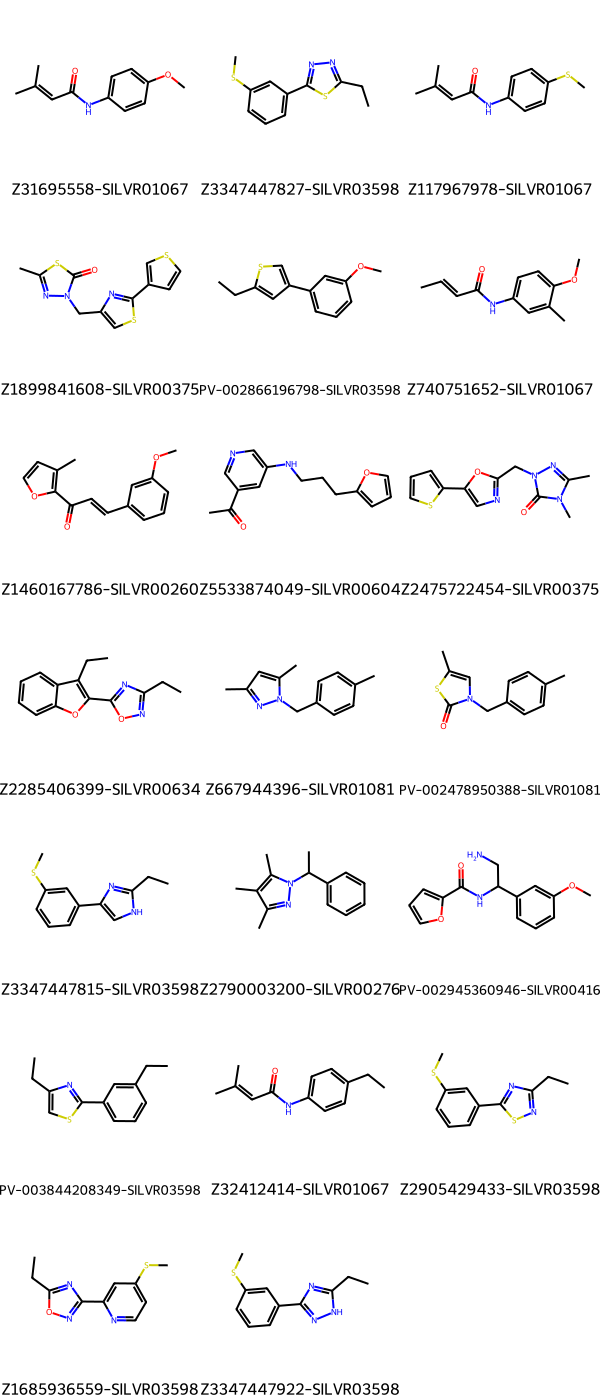

In [49]:
from rdkit.Chem import Draw

s = analogs.sort_values('∆∆G').head(20)

Draw.MolsToGridImage([Chem.MolFromSmiles(Chem.MolToSmiles(m)) for m in s.minimized_mol], legends=s.name.to_list())

In [50]:
from kmodes.kmodes import KModes
import pandera.typing as pdt

k = 25

intxn_cols = [c for c in analogs.columns if isinstance(c, tuple)]
data_for_clustering = analogs.loc[analogs.outcome == 'acceptable'][intxn_cols].fillna(0).copy()
tallies = data_for_clustering.sum().to_dict()
# probability scaled
#data_for_clustering = data_for_clustering.apply(lambda col: col / tallies[col.name],axis=0).fillna(0)

# rubbish scaled
def scale(col):
    if col.name[0] == 'hydroph_interaction':
        w = 0.5
    if col.name[0] in 'halogenbond':
        w = 1.5
    elif col.name[0] == 'saltbridge':
        w = 2.0
    else:
        w = 1.0
    return col * w

data_for_clustering = data_for_clustering.apply(scale, axis=0).fillna(0)

from scipy.cluster.vq import kmeans, vq

centroid, variance = kmeans(data_for_clustering.values, k)
labels, _ = vq(data_for_clustering.values, centroid)
# list to series first for the correct indices:
data_for_clustering['cluster']: pdt.Series[int] = labels
analogs['intx_cluster']: pdt.Series[float] = data_for_clustering.cluster
analogs['intx_cluster']: pdt.Series[int] = analogs['intx_cluster'].fillna(-1).astype(int)

In [51]:
energy_weights = {"N_rotatable_bonds": 1,
                  "\u2206\u2206G": 1,
                  "strain_per_HA": 0.3}

from fragmenstein import Laboratory

Laboratory.score(analogs, vcs.loc[vcs.hit_mols.astype(bool)],
                 suffix='',
                 weights=energy_weights,)

/data/xchem-fragalysis/mferla/waconda/envs/compchem/lib/python3.11/site-packages/fragmenstein/laboratory/_score.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hit_replacements['new_name'] = hit_replacements.hit_mols.apply(lambda ms: ms[0].GetProp('_Name'))
/data/xchem-fragalysis/mferla/waconda/envs/compchem/lib/python3.11/site-packages/fragmenstein/laboratory/_score.py:183: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  placements['PAINSes'] = placements.minimized_mol.apply(get_pains)
/data/xchem-fragalysis/mferl

In [52]:
analogs['fp_cluster'] = analogs['cluster']
del analogs['cluster']

/tmp/ipykernel_41819/3689778969.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  analogs['fp_cluster'] = analogs['cluster']


In [53]:
from collections import defaultdict
from Bio.SeqUtils import seq1
rank = defaultdict(int)

def r(c):
    rank[c] += 1
    return rank[c]

def narrate(row: pd.Series):
    grouped = defaultdict(list)
    for name, value in row.items():
        if not isinstance(name, tuple) or value == 0.:
            continue
        itxn_type, resn, resi = name
        grouped[itxn_type].append(seq1(resn, undef_code="X")+str(resi))
    narrative = f'cluster #{row.intx_cluster} (rank {row.cluster_rank}); '
    for itxn_type in sorted(grouped):
        narrative += f'{itxn_type}:{"+".join(grouped[itxn_type])}; '
    return narrative

# 'fp_cluster' is Similarity cluster
analogs = analogs.sort_values('ad_hoc_penalty').drop_duplicates('fp_cluster').reset_index(drop=True)
analogs['cluster_rank'] = analogs['intx_cluster'].apply(r)
analogs['rationale'] = 'info ' + analogs.apply(narrate, axis=1)
assert analogs['rationale'].apply(len).max() < 255, 'Fix length!'
analogs = analogs.sort_values(['cluster_rank', 'ad_hoc_penalty']).reset_index(drop=True).copy()

In [54]:
from gist_import import GistImporter

# fu for fragalysis upload
fmodule = GistImporter.from_github('https://raw.githubusercontent.com/matteoferla/Fragment-hit-follow-up-chemistry/main/followup/prep_fragalysis.py')
prep = fmodule['prep']
generate_header = fmodule['generate_header']
floatify_columns = fmodule['floatify_columns']

In [55]:
def catalogize(name):
    if name[0] == 'Z':
        return name.split('-')[0]
    if name[0] == 'P':
        return 'PV-'+name.split('-')[1]
    else:
        return name

analogs['catalog_id'] = analogs.name.apply(catalogize)

In [57]:
wanted_key_types = {'rationale': str, 
               'cluster_rank': int,
               'N_interactions': int, 
               'N_interactions_lost': int,
               '∆∆G': float, 
                    'comRMSD': float,
                    'N_rotatable_bonds': int, 
                     'N_unconstrained_atoms': int,
                    'N_constrained_atoms': int
                   }

for k, ktype in wanted_key_types.items():
    analogs[k] = analogs[k].astype(ktype)

wanted_keys = list(wanted_key_types)

def clean_names(names):
    deprefixed = [name.replace('A71EV2A-', '').split('S')[0] for name in names]
    return ','.join([name for name in deprefixed if name[0] == 'x'])

analogs['ref_mols'] = ','.join(['x0451_0A', 'x0554_0A', 'x0556_0A', 'x0566_0A', 'x0310_0A', 'x0416_0A'])

header: Chem.Mol = generate_header(method='A71-SILVR',
                         ref_url='https://github.com/matteoferla/EV-A71-2A-elaborations',
                         submitter_name='Janke Scheen',
                         submitter_email='jenke.scheen@choderalab.org',
                         submitter_institution='MSKCC',
                         extras=dict(zip(wanted_keys, wanted_keys))
                                  )
                                   
prep(analogs.head(200), 
     header, mol_col='minimized_mol', 
     name_col='catalog_id',
     outfile=f'A71-SILVR.sdf',
     ref_pdb_name='x0554_0A',
     extras=wanted_keys
    )

[16:54:14] Molecule does not have explicit Hs. Consider calling AddHs()


In [ ]:
from scipy.cluster.vq import kmeans, vq
import pandera.typing as pdt

def cluster_by_probability_scaled_intxns(df: pd.DataFrame, k=25, cluster_label='cluster'):
    """
    In Fragmenstein outputted dfs, the interactions are actually tuples of resn, resi intxn type,
    which makes handling them easier.
    """
    intxn_cols = [c for c in df.columns if isinstance(c, tuple)]
    data_for_clustering = df.loc[analogs.outcome == 'acceptable'][intxn_cols].fillna(0)
    tallies = data_for_clustering.sum().to_dict()
    # probability scaled
    data_for_clustering = data_for_clustering.apply(lambda col: col / tallies[col.name],axis=0).fillna(0)
    
    centroid, variance = kmeans(data_for_clustering.values, k)
    labels, _ = vq(data_for_clustering.values, centroid)
    # list to series first for the correct indices:
    data_for_clustering['cluster']: pdt.Series[int] = labels
    df[cluster_label]: pdt.Series[float] = data_for_clustering.cluster
    df[cluster_label]: pdt.Series[int] = df[cluster_label].fillna(-1).astype(int)
    return None

cluster_by_probability_scaled_intxns(replacements)